In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np

import pandas as pd

import seaborn as sb
sb.set_context("notebook", font_scale=2)

from sklearn import metrics, preprocessing
from sklearn.cross_validation import train_test_split

import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import Image

<h1><center>Introduction to TensorFlow and Machine Learning</center></h1>

<h2><center>David M. Clark</center></h2>
<h2><center>August 3, 2016</center></h2>

<h2><center>Outline</center></h2>
<p><font size="5">
Goal: Use an interesting data set to set up a simple model that demonstrates machine learning and TensorFlow.
<ul>
    <li>Give an introduction to machine learning.</li><br><br>
    <li>Prepare the data for modeling.</li><br><br>
    <li>Model the data using TensorFlow.</li><br><br>
    <li>Graphically display the model using TensorBoard.</li>
</ul>
</font></p>

<h2><center>What Is Machine Learning?</center></h2>
<p><font size="5">
"Field of study that gives computers the ability to learn without being explicitly programmed." &ndash; Arthur Samuel, 1959
<br><br>
<ul>
    <li>Three types:</li><br>
    <ul>
        <li>Unsupervised learning.</li><br>
        <li>Supervised learning.</li><br>
        <li>Reinforcement learning.</li><br>
    </ul>
</ul>
</font>
</p>

<h2><center>Unsupervised Learning</center></h2>
<p><font size="5">
Analogy: Give a toddler an assortment of toy cars and tell him to put the cars into groups.
<br><br>
<ul>
    <li>Unlabeled data.</li><br><br>
    <li>Examples include:</li><br>
    <ul>
        <li>Clustering: Group types of crime in a city by medium income in that area.</li><br>
        <li>Anomoly detection.</li><br>
    </ul>
</ul>
</font>
</p>

<h2><center>Supervised Learning</center></h2>
<p><font size="5">
Analogy: Give a toddler an assortment of toys. Tell him these are cars, these are vans, and these are trucks. Then, take the toys away and present him with a new set. Tell him to identify the different types of vehicles.
<br><br>
<ul>
    <li>Labeled data.</li><br><br>
    <li>Examples include:</li><br>
    <ul>
        <li>Using housing data for the past year, predict whether housing prices will increase or decrease next year.</li><br>
        <li>Classify a runner's performance based on his/her gait.</li><br>
        <li>Use image recognition with self-driving cars to tell the difference between a stop sign and a yield sign.</li><br>
    </ul>
</ul>
</font>
</p>

<h2><center>Reinforcement Learning</center></h2>
<p><font size="5">
Analogy: Teach a toddler good table maners. If a toddler behaves well at dinner, reward her with a cookie. If she misbehaves, send her to her room.
<br>
<ul>
    <li>Example:</li><br>
    <ul>
        <li>A security robot at Stanford Shopping Center deciding whether to do another patrol or return to its charging station, based on its battery charge level.</li><br>
    </ul>
</ul>
</font>
</p>

<center><img src="images/knightscope_robot.jpg" style="width:450px"></img></center>

<h2><center>Types of Machine Learning Algorithms</center></h2>
<img src="images/ml_map.png"></img>

<h2><center>Wine Data Set</center></h2>
<p><font size="5">
<ul>
    <li>Data set taken from the UCI Machine Learning Repository (<a href="http://archive.ics.uci.edu/ml" target="_blank">http://archive.ics.uci.edu/ml</a>)</li><br><br>
    <li>Consists of chemical properties for many types of wine.</li><br>
    <ul>
        <li>These are the <b>features</b>.</li><br><br>
    </ul>
    <li>Each wine is assigned a subjective quality score from 0 - 10.</li><br>
        <ul>
        <li>These are the <b>labels</b>.</li><br>
    </ul>
    <br>
    <li>Goal: Use machine learning to predict a wine's quality based on its chemical properties.</li><br>
</ul>
</font>
</p>

<h2><center>Data Preparation</center></h2>
<p><font size="5">
<ul>
    <li>Inspect the data.</li><br>
    <br>
    <li>Clean the data.</li><br>
    <ul>
        <li>Remove outliers.</li><br>
        <li>Trim features.</li><br>
        <li>etc.</li><br>
    </ul>
    <br>
    <li>Divide the data into train and test sets.</li>
</ul>
</font>
</p>

<h2><center>Load the Data</center></h2>
<p><font size="5">
<ul>
    <li>We will load the data into a Pandas DataFrame.</li><br><br>
    <li>A DataFrame is like an Excel table.</li><br>
</ul>
</font>
</p>

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')

<h2><center>Inspect the data with Pandas</center></h2>
<p><font size="5">
<ul>
    <li>Pandas is a Python data analysis package developed by Wes McKinney.</li>
    <br><br>
    <li>Great tool for data manipulation and data analysis.</li>
    <br><br>
    <li>Three useful functions to inspect the data are: <b><code>info()</code></b>, <b><code>head()</code></b>, and <b><code>describe()</code></b>
</ul>
</font>
</p>

<h2><center><code>info()</code></center></h2>
<p><font size="5">
<ul>
    <li>Used to view data types and size of the DataFrame.</li>
</ul>
</font>
</p>

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<h2><center><code>head()</code></center></h2>
<p><font size="5">
<ul>
    <li>View the first 5 rows of the DataFrame.</li>
</ul>
</font>
</p>

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h2><center><code>descibe()</code></center></h2>
<p><font size="5">
<ul>
    <li>Show metrics of the columns in the DataFrame.</li>
</ul>
</font>
</p>

In [5]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<h2><center>Scatter Plot Matrix</center></h2>
<p><font size="5">
<ul>
    <li>A grid of plots for the data set. Each feature is plotted against every other feature.</li>
    <br><br>
    <li>A feature plotted versus itself is a histogram.</li>
    <br><br>
    <li>A great graphical tool to understand the relationship between each feature.</li>
    <br><br>
    <li>The Seaborn library provides a nice routine to make a scatter plot matrix.</li>
</ul>
</font>
</p>

<h2><center>Scatter Plot Matrix</center></h2>

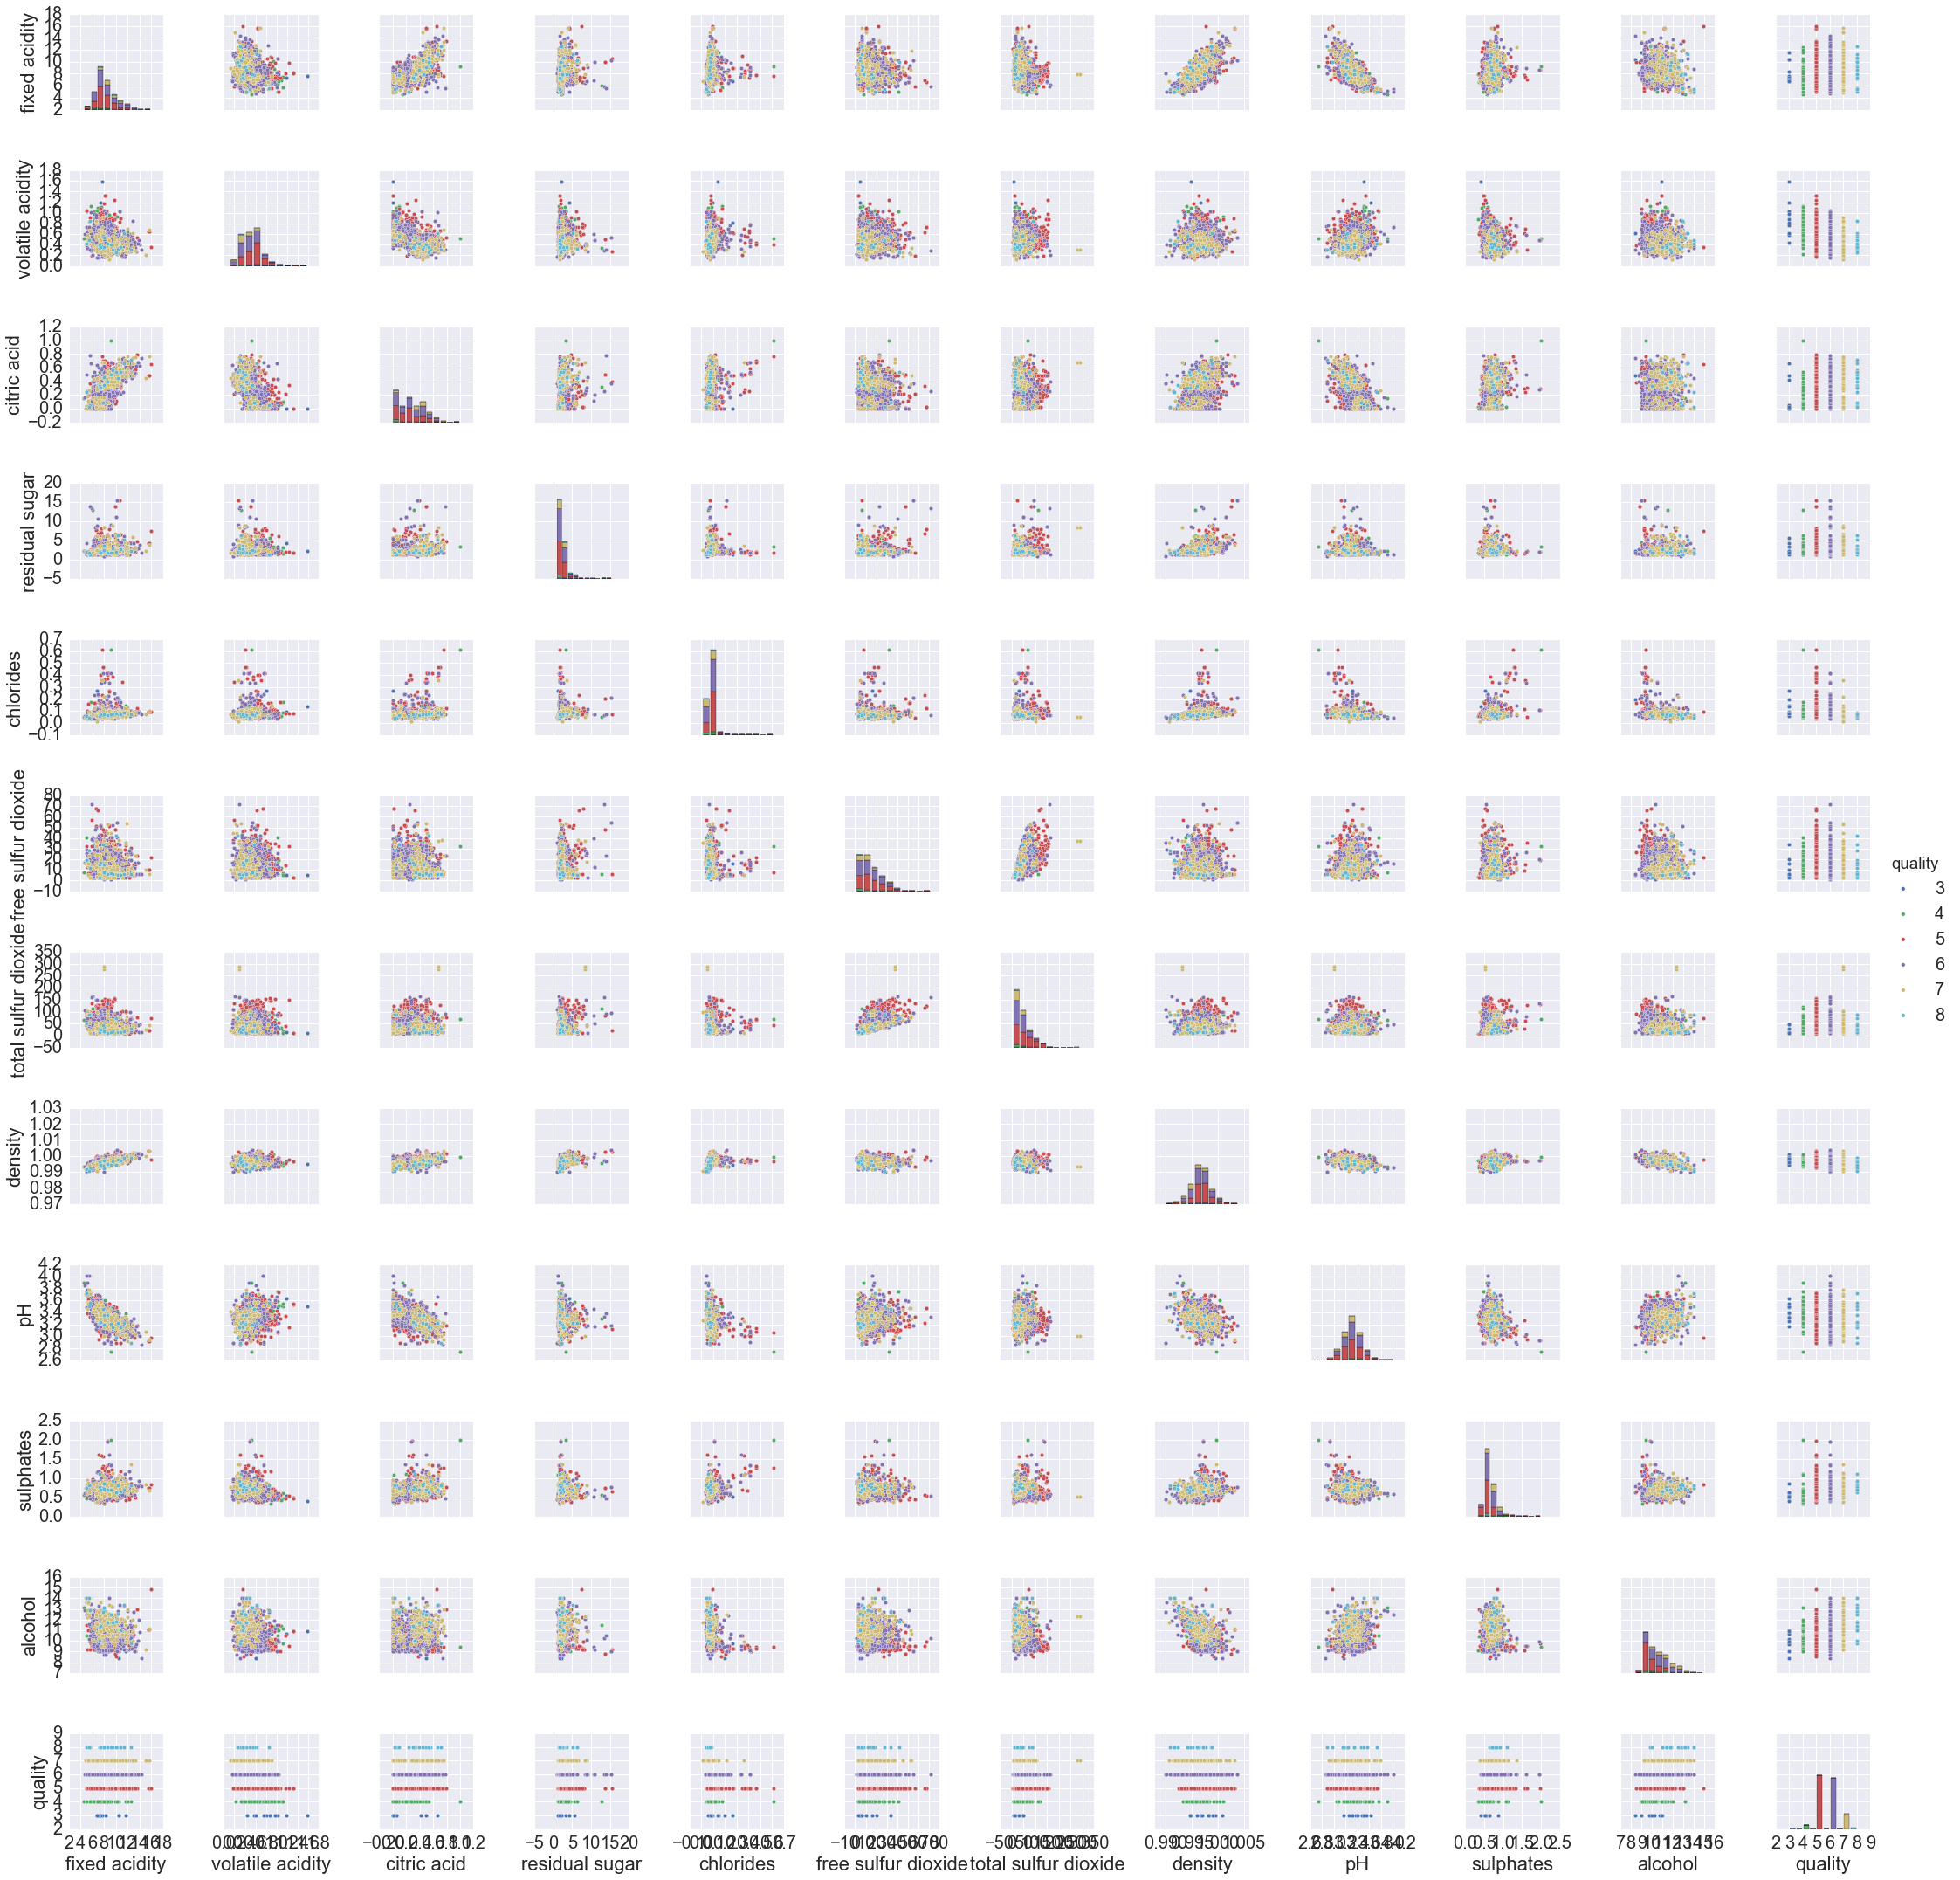

In [6]:
sb.pairplot(red_wine, hue='quality')

<h2><center>Outliers</center></h2>
<p><font size="5">
<ul>
    <li>Features with extreme values can tend to pull the model fit in the wrong direction.</li>
    <br><br>
    <li>For this demonstration, I will use a simple aproximation and define outliers as those values that are greater than five standard deviations from the mean.</li>
    <br>
    <ul>
        <li>These values will be set to the mean of that features distribution.</li>
    <br>
    </ul>
</ul>
</font>
</p>

<h2><center>Removing Outliers</center></h2>

In [7]:
# Define function to identify outliers and set mean to feature distribution mean
def outliers(df, threshold, columns):
    for col in columns: 
        mask = df[col] > float(threshold)*df[col].std()+df[col].mean()
        df.loc[mask == True,col] = np.nan
        mean_property = df.loc[:,col].mean()
        df.loc[mask == True,col] = mean_property
    return df

# Save column names to a list
column_list = red_wine.columns.tolist()
threshold = 5

# Remove outliers for every column except the quality column
red_wine_cleaned = red_wine.copy()
red_wine_cleaned = outliers(red_wine_cleaned, threshold, column_list[0:-1])

<h2><center>Collinearity</center></h2>
<p><font size="5">
<ul>
    <li>A pair or set of features exhibiting a strong relationship with each other.</li><br>
    <br>
    <li>It poses problems for regression models.</li><br>
    <ul>
        <li>Difficult to understand how each feature separately affects the response.</li><br>
    </ul>
    <br>
    <li>A heatmap is a useful tool to identify collinearity between features.</li>
</ul>
</font>
</p>

<h2><center>Heat Map</center></h2>
<p><font size="5">
<ul>
    <li>The Seaborn library also provides a heatmap routine.</li><br>
    <br>
    <li>It consists of a grid of plots for each feature in the data set, like the scatter plot matrix.</li><br>
    <br>
    <li>Each plot is a block of solid color showing the correlation between each feature.</li><br>
    <ul>
        <li><span style="color:blue">Bluer</span> indicates stronger <span style="color:blue">negative</span> correlation.</li><br>
        <li><span style="color:red">Redder</span> indicates stronger <span style="color:red">positive</span> correlation.</li>
    </ul>
</ul>
</font>
</p>

<h2><center>Heat Map</center></h2>

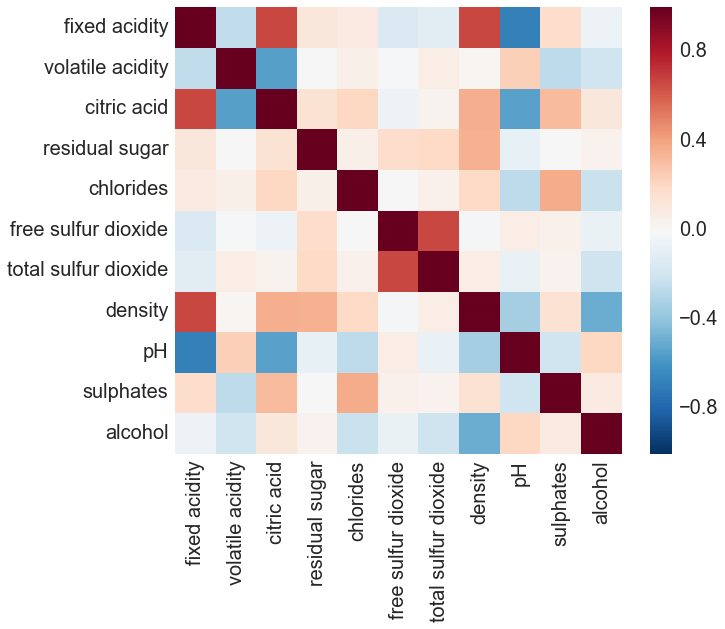

In [8]:
plt.figure(figsize=(10, 8))
sb.heatmap(red_wine.drop(['quality'],1).corr())

<h2><center>Removing Collinear Features</center></h2>
<p><font size="5">
<ul>
    <li>Perfect correlation, r = 1.0.</li><br>
    <br>
    <li>No correlation, r = 0.0.</li><br>
    <br>
    <li>Weak correlation, r &#60; 0.5.</li><br>
    <br>
    <li>Features that show a strong correlation with another feature are:</li><br>
    <ul>
        <li>fixed acidity, volatile acidity, citric acid, density, total sulfur dioxide</li><br>
    </ul>
    <br>
    <li>I will remove these from the feature set.</li>
</ul>
</font>
</p>

<h2><center>Removing Collinear Features</center></h2>

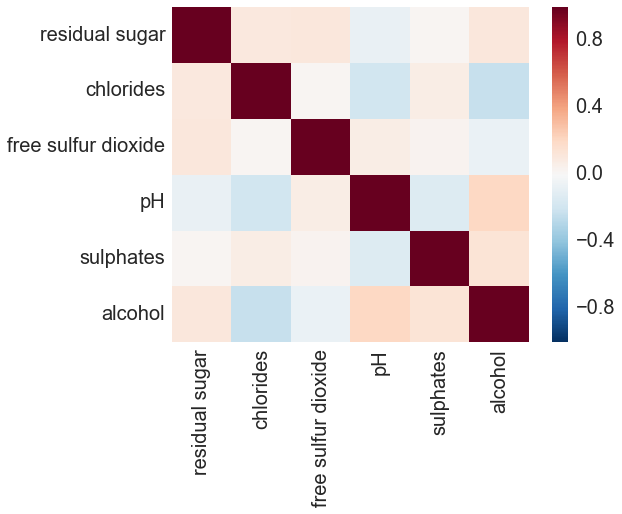

In [9]:
features_to_drop = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'total sulfur dioxide']
red_wine_trimmed_features = red_wine_cleaned.copy()
red_wine_trimmed_features.drop(features_to_drop, axis=1, inplace=True)

plt.figure(figsize=(8, 6))
sb.heatmap(red_wine_trimmed_features.drop(['quality'],1).corr())

<h2><center>Narrowing Labels</center></h2>
<p><font size="5">
<ul>
    <li>Looking at the scatter plot matrix, you will notice that the chemical properities overlap for wines of different qualities.</li>
</ul>
</font>
</p>

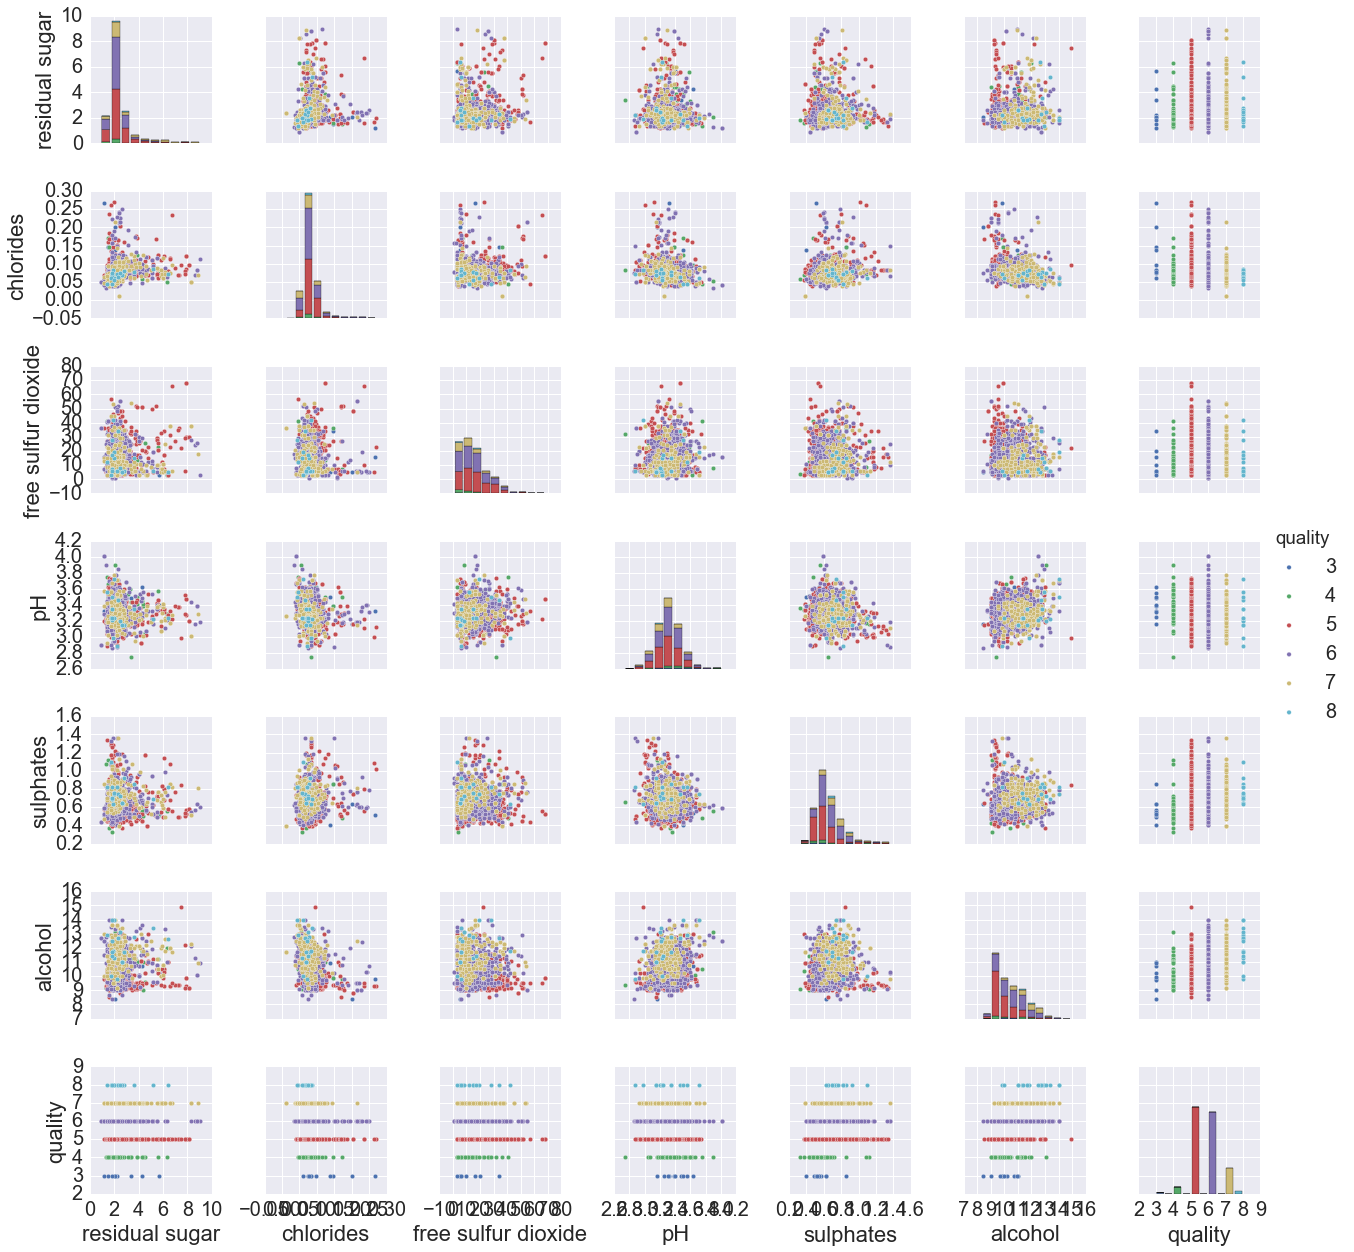

In [10]:
sb.pairplot(red_wine_trimmed_features, hue='quality')

<h2><center>Narrowing Labels</center></h2>
<p><font size="5">
<ul>
    <li>To simplify the model, I will only consider two qualities, 5 and 7.</li>
</ul>
</font>
</p>

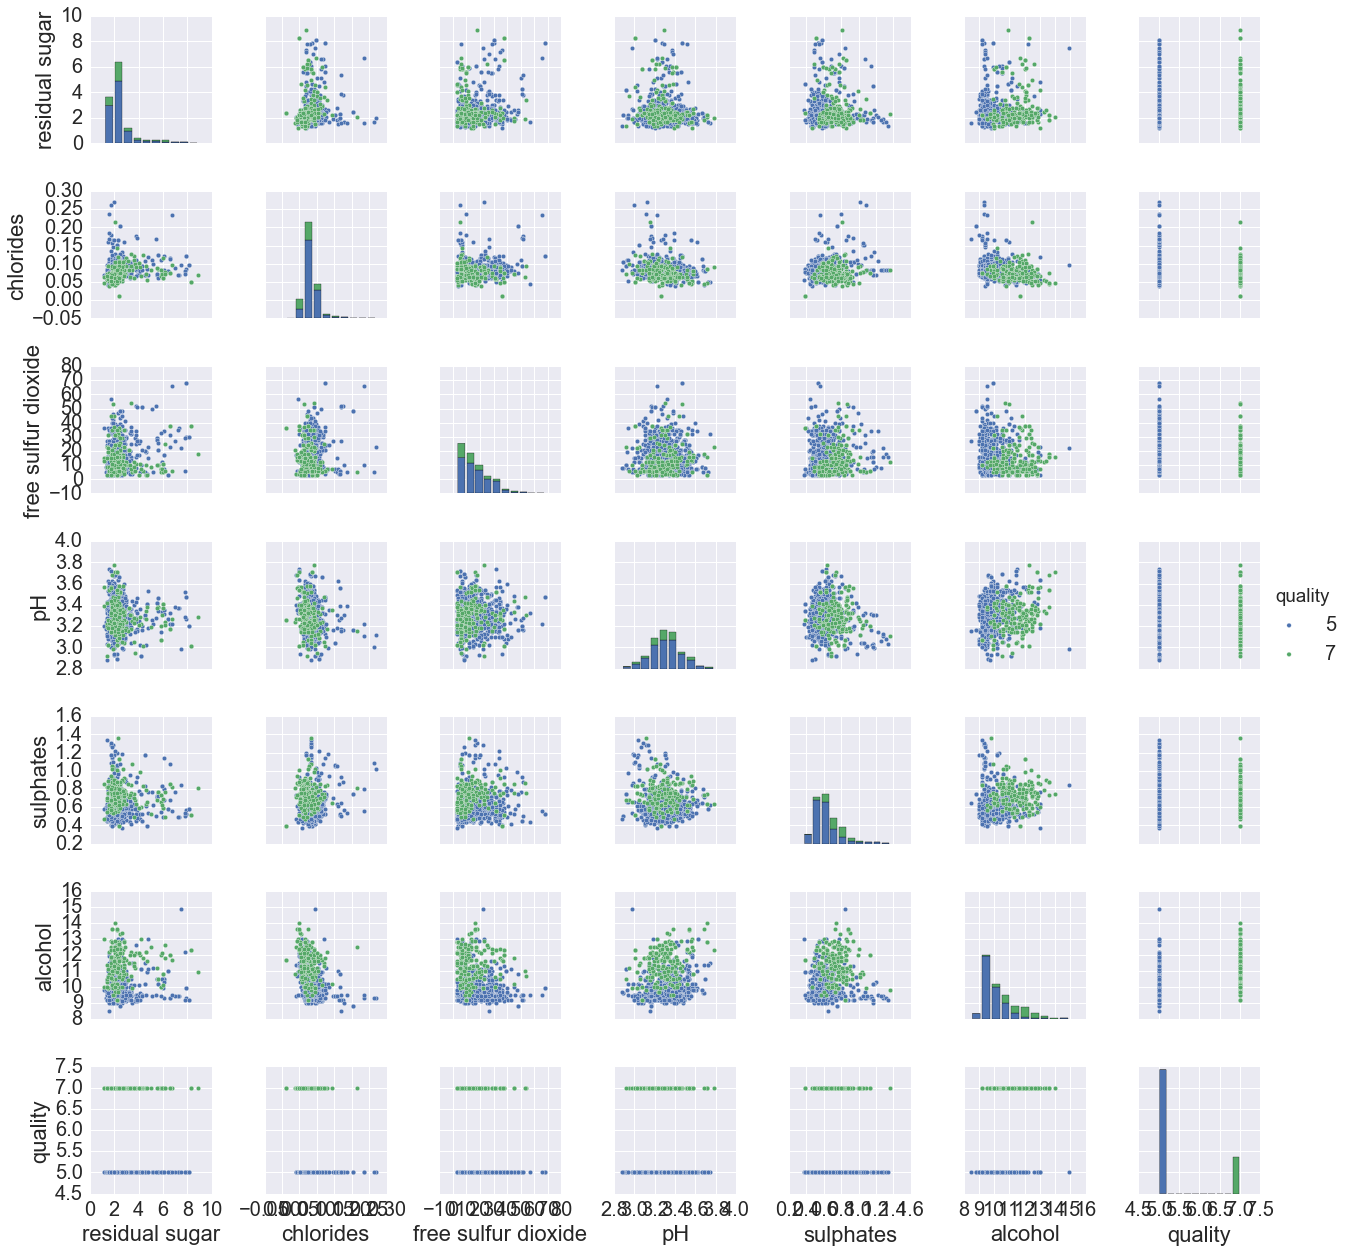

In [11]:
qualities_to_drop = [3, 4, 6, 8]

red_wine_trimmed_qualities = red_wine_trimmed_features.copy()
for q in qualities_to_drop:
    red_wine_trimmed_qualities = red_wine_trimmed_qualities[red_wine_trimmed_qualities.quality != q]
    
sb.pairplot(red_wine_trimmed_qualities, hue='quality')

<h2><center>Separate Labels and Features</center></h2>
<p><font size="5">
<ul>
    <li>The labels are the quality values.</li>
    <br>
    <li>The features are everything else: fixed acidity, volatile acidity, citric acid, density, and total sulfur dioxide.
    </li>
</ul>
</font>
</p>

In [12]:
# Feature set
X_red_wine = red_wine_trimmed_qualities.drop('quality', axis=1)

# Labels
y_red_wine = red_wine_trimmed_qualities['quality']

# Store number of features in a variable
number_of_features = len(X_red_wine.columns)

# Store number of labels in a variable
number_of_classes = len(y_red_wine.unique())

<h2><center>One-hot Vectors</center></h2>
<p><font size="5">
<ul>
    <li>TensorFlow requires that the labels be expressed in a special way.</li><br>
    <br>
    <li>Each unique label is expressed as a vector of 0's and 1's. In our case:</li><br>
    <ul>
        <li><code>5 &rArr; [1, 0]</code></li><br>
        <li><code>7 &rArr; [0, 1]</code></li><br>
    </ul>
    <br>
    <li>These vectors are called one-hot vectors.</li>
</ul>
</font>
</p>

<h2><center>One-hot Vectors</center></h2>

In [13]:
# Reduce qualities to numbers from 0 to number of different qualities
def replace_labels(label_series):
    labels_to_replace = np.sort(label_series.unique()).tolist()
    replace_with = np.arange(len(labels_to_replace)).tolist()
    new_series = label_series.replace(to_replace=labels_to_replace, value=replace_with)
    
    return new_series

y_red_wine_list = replace_labels(y_red_wine).tolist()

# Convert labels into one-hot vectors
def dense_to_one_hot(labels_dense, num_classes=3):
    # Convert class labels from scalars to one-hot vectors
    num_labels = len(labels_dense)
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense] = 1
    return labels_one_hot

y_one_hot = dense_to_one_hot(y_red_wine_list, num_classes=number_of_classes)

<h2><center>Train/Test Split</center></h2>
<p><font size="5">
<ul>
    <li>Models in machine learning are always trained on one portion of the data set and tested on a separate set of data that the model has not seen before.</li><br>
    <br>
    <li>For this data set, I will set aside 10&#37; of the data for testing.</li>
    <br>
</ul>
</font>
</p>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_one_hot, test_size=0.1, random_state=42)

<h2><center>Tensor Flow</center></h2>
<p><font size="5">
<ul>
    <li>A machine learning library orginally developed by the Google Brain Team.</li>
    <br>
    <li>Graph based.</li>
    <ul>
        <li>Nodes are operations.</li>
        <li>Edges are multi-dimensional arrays called tensors.</li>
        <br>
    </ul>
    <li>All operations are done outside of Python, in a TensorFlow session.</li>
    <br>
    <li>Inputs are stored in a <b><code>placeholder()</code></b> or a <b><code>Variable()</code></b>.</li>
    <ul>
        <li><b><code>placeholder()</code></b>: good for storing fixed input, such as the training set.</li>
        <li><b><code>Variable()</code></b>: good for storing variable input, such as weights and biases, which will be tuned during the modeling process.</li>
        <br>
    </ul>
    <br>
    <li>These inputs are populated during the TensorFlow session.</li>
</ul>
</font>
</p>

<h2><center>What is a Tensor?</center></h2>
<p><font size="5">
<ul>
    <li>Vector: One-dimension.</li><br>
    <li>Matrix: Two-dimensions.</li><br>
    <li>Tensor: n-dimensions.</li><br>
</ul>
</font>
</p>
<img src="images/tensor_examples.svg" style="width:800px"></img>
<p><font size="2">
<center>Image from <a href="http://noaxiom.org/tensor">http://noaxiom.org/tensor.</a></center>
</font>
</p>
<p><font size="5">
<ul>
    <li>TensorFlow stores data in tensors.</li>
</ul>
</font>
</p>

<h2><center>Softmax Regression</center></h2>
<p><font size="5">
<ul>
    <li>For each wine, assign a probability that it is of a specific quality, in this case a 5 or a 7.</li><br>
    <br>
    <li>Softmax regression is a good method for assigning an object a probability that it is in a specific group.</li>
</ul>
</font>
</p>

<h2><center>Softmax Regression</center></h2>
<p><font size="5">
<ul>
    <li>Two steps:</li><br>
    <ul>
        <li>Add up evidence that a wine is of a specific quality.</li><br>
        <li>Convert evidence into probabilities.</li><br>
    </ul>
    <br>
    <li>Evidence: Weighted sum of chemical properties.</li><br>
    <ul>
        <li><span style="color:red">Negative weight</span>: Evidence wine <span style="color:red">is not</span> of that quality.</li><br>
        <li><span style="color:blue">Positive weight</span>: Evidence wine <span style="color:blue">is</span> of that quality.</li><br>
    </ul>
</ul>
</font>
</p>

<h2><center>Softmax Regression</center></h2>
<p><font size="5">
<ul>
    <li>Mathematically:</li>
    <br>
</ul>
$$E_i = \sum\limits_{j}W_{i,j}x_j + b_i$$
<br>
E<sub>i</sub> = evidence, W<sub>i,j</sub> = weights, b<sub>i</sub> = biases, x<sub>j</sub> is the input property of the wine.
</font>
</p>
<br>
<p><font size="5">
<ul>
    <li>Convert evidence to predicted probabilites:</li>
    <br>
</ul>
$$y = softmax(E)$$
</font>
</p>

<h2><center>Softmax Regression</center></h2>
<p><font size="5">
<ul>
    <li>Vector notation:</li>
    <br>
</ul>
$$\begin{bmatrix}y_1 \\ y_2 \\ ... \\ y_i\end{bmatrix} = softmax\Bigg(
\begin{bmatrix}W_{1,1} & W_{1,2} & ... & W_{1,j} \\
W_{2,1} & W_{2,2} & ... & W_{2,j} \\
... & ... & ... & ... \\
W_{i,1} & W_{i,2} & ... & W_{i,j}\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ ... \\ x_i
\end{bmatrix}
+
\begin{bmatrix}
b_1 \\ b_2 \\ ... \\ b_i
\end{bmatrix}
\Bigg)$$
<br>
<p><font size="5">
<ul>
    <li>In simpler form:</li>
    <br>
</ul>
$$y = softmax(Wx + b)$$
</font>
</p>

<h2><center>Set Up The Model</center></h2>

In [15]:
# Placeholders for training features and labels
X = tf.placeholder("float", [None, number_of_features])
y = tf.placeholder("float", [None, number_of_classes])

# Variable to store weights
W = tf.Variable(tf.zeros([number_of_features, number_of_classes]), name='Weights')

# Variable to store biases
b = tf.Variable(tf.zeros([number_of_classes]), name='Biases')

<h2><center>Set Up The Model: TensorBoard</center></h2>
<p><font size="5">
I will add extra code in order to prepare the visualization tool TensorBoard so we can graphically view the model.
<br>
<ul>
<li>I use <b><code>name_scope()</code></b> to organize nodes in the graph visualizer.</li>
<br>
<li>Scope is a TensorFlow library that allows the user to share variables.</li>
<br>
</ul>
</font>
</p>

In [16]:
with tf.name_scope("Wx_b") as scope:
  model = tf.nn.softmax(tf.matmul(X, W) + b)

# Define histograms for TensorBoard
w_hist = tf.histogram_summary("Weights", W)
b_hist = tf.histogram_summary("Biases", b)
y_hist = tf.histogram_summary("model", model)

<h2><center>Cost Function</center></h2>
<p><font size="5">
<ul>
    <li>A function to measure how far off the model fit is from the training data.</li>
    <br>
    <li>For this dataset I will use the <span style="color:blue">cross-entropy</span> function, defined as:.</li>
    <br>
</ul>
$$H_{y'}(y) = -\sum\limits_{i} y'_i log(y_i) $$
<br>
y'<sub>i</sub> = training labels, y<sub>i</sub> = model
</font>
</p>

In [17]:
with tf.name_scope("cross_entropy") as scope:
  cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(model), reduction_indices=[1]))
  ce_summ = tf.scalar_summary("cross entropy", cross_entropy)

<h2><center>Optimization Function</center></h2>
<p><font size="5">
<ul>
    <li>A function to define how the cost function is minimized.</li><br>
    <br>
    <li>It uses a term called the <span style="color:blue">learning rate</span>. This says how fast the minimization should be done.</li><br>
    <ul>
        <li><span style="color:red">Too Large:</span> Overshoot the minima.</li><br>
        <li><span style="color:red">Too Small:</span> Could take forever to find the minima.</li><br>
    </ul>
    <br>
    <li>I will use the function <span style="color:blue">gradient descent</span>.</li><br>
    <br>
    <li>Note: There are many other types of functions that could be used.</li>
</ul>
</font>
</p>

<h2><center>Optimization Function</center></h2>

In [18]:
# Specify the learning rate
learning_rate = 0.01

# Define gradient descent function
with tf.name_scope("train") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# Define name scope to store output accuracy of the model
with tf.name_scope("test") as scope:
  correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  accuracy_summary = tf.scalar_summary("accuracy", accuracy)

<h2><center>Batches and Epochs</center></h2>
<p><font size="5">
During model training, it helps to gauge how the model is improving and use that to help minimize the cost. One way to do this is to divide the training data into <b>batches</b>.
<br>
<ul>
    <li>Fit model to first batch.</li><br>
    <li>Update the model.</li><br>
    <li>Use updated model on next batch.</li><br>
    <li>Repeat procedure to end of training data set.</li><br>
</ul>
<br>
This training step can be repeated many times, each time improving on the model accuracy. Each repetition is called an <b>epoch</b>.
</font>
</p>

<h2><center>Training the Model</center></h2>
<p><font size="5">
Now it's time to train the model and output an accuracy.
</font>
</p>

In [19]:
batch_size = 120
with tf.Session() as sess:
    
    merged = tf.merge_all_summaries()
    writer = tf.train.SummaryWriter("tmp/wine_quality_logs", sess.graph)
    
    tf.initialize_all_variables().run()
    
    # Run training step 1000s times
    for i in range(1000):
        
        # Loop through training set in batches
        number_of_batches = int(len(X_train) / batch_size)
        if i % 100 == 0:
            feed = {X: X_test, y: y_test}
            result = sess.run([merged, accuracy], feed_dict=feed)
            summary_str = result[0]
            acc = result[1]
            writer.add_summary(summary_str, i)
            print("Accuracy at step %s: %s" % (i, acc))
        else:
            for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
                feed = {X: X_train[start:end], y: y_train[start:end]}
                sess.run(optimizer, feed_dict=feed)
                
    print("Final Accuracy: {0}".format(sess.run(accuracy, feed_dict={X: X_test, y: y_test})))

Accuracy at step 0: 0.75
Accuracy at step 100: 0.784091
Accuracy at step 200: 0.829545
Accuracy at step 300: 0.829545
Accuracy at step 400: 0.840909
Accuracy at step 500: 0.840909
Accuracy at step 600: 0.840909
Accuracy at step 700: 0.840909
Accuracy at step 800: 0.852273
Accuracy at step 900: 0.852273
Final Accuracy: 0.852272748947


<h2><center>TensorBoard</center></h2>
<p><font size="5">
<ul>
<li>TensorBoard can be launched by issuing the following command from the directory of this project:</li>
<br>
<b><code>python ~/anaconda/bin/tensorboard --logdir=tmp/wine_quality_logs</code></b>
<br><br>
<li>Then open TensorBoard by going to the following link: <a href="http://0.0.0.0:6006/" target="_blank">http://0.0.0.0:6006/</a></li>
</ul>
<br>
</font>
</p>

<h2><center>Why is TensorFlow better than other machine learning tools?</center></h2>
<p><font size="5">
<ul>
<li>Portable to many types of hardware, from mobile devices to distributed GPUs.</li>
<br>
<li>Includes a visualization module (TensorBoard).</li>
<br>
<li>Events are logged and model training progress can be followed interactively using TensorBoard.</li>
<br>
<li>Model training is stored in checkpoints. The training can be stopped, evaluated, and then restarted at the checkpoint.</li>
<br>
<li>Open source.</li>
<br>
</ul>
</font>
</p>

<h2><center>Conclusions</center></h2>
<p><font size="5">
<ul>
<li>Produced a model to predict the quality of a wine based on its chemical properties.</li>
<br>
<li>Demonstrated the steps to prepare the data for modeling.</li>
<br>
<li>Gave an introduction to TensorFlow and showed how it could be used to model this data set.</li>
<br>
<li>Displayed a graphical representation of the model using TensorBoard.</li>
<br>
</ul>
</font>
</p>